In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import csv
from tensorflow import keras
import keras
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import librosa
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data= pd.read_csv('/content/drive/MyDrive/Audio_Classification-MLSP/annotations.csv')
file_names = data.fname
labels = data.label
labels = labels.to_numpy()
labels=pd.get_dummies(labels)
data = []
for i in file_names:
    address = '/content/drive/MyDrive/Audio_Classification-MLSP/train/' + i
    data.append(np.load(address))

In [4]:
for i in range(1000):
  data[i] = np.concatenate((data[i], np.zeros(shape=(1, 128, 2584-data[i].shape[2]))), axis = 2)
  data[i] = data[i].flatten()

In [5]:
mfcc_data = []
for i in range(1000):
  mfccs_features = librosa.feature.mfcc(y=data[i],sr = 44100,  n_fft = 2048, hop_length = 512,  n_mfcc=128 , window ="hann")
  mfccs_features = mfccs_features / np.max(np.abs(mfccs_features))
  mfcc_data.append(mfccs_features)
mfcc_data = np.asarray(mfcc_data)

In [6]:
new_data = np.empty((1000, 128, 647, 1))
for i in range(1000):
  new_data = mfcc_data.reshape(1000, 128, 647, 1)

In [7]:
import os 
from os import listdir
f = []
f = listdir('/content/drive/MyDrive/Audio_Classification-MLSP-test')

In [8]:
test = []
for i in f:
    address = '/content/drive/MyDrive/Audio_Classification-MLSP-test/' + i
    test.append(np.load(address))

In [9]:
for i in range(201):
  test[i] = np.concatenate((test[i], np.zeros(shape=(1, 128, 2584-test[i].shape[2]))), axis = 2)
  test[i] = test[i].flatten()

In [10]:
test_data = []
for i in range(201):
  mfccs_features = librosa.feature.mfcc(y=test[i],sr = 44100,  n_fft = 2048, hop_length = 512,  n_mfcc=128 , window ="hann")
  mfccs_features = mfccs_features / np.max(np.abs(mfccs_features))
  test_data.append(mfccs_features)
test_data = np.asarray(test_data)

In [11]:
test_data = np.empty((1000, 128, 647, 1))
for i in range(201):
  test_data = test_data.reshape(1000, 128, 647, 1)

In [12]:
# from sklearn.model_selection import train_test_split
# test_x, train_x, test_y, train_y = train_test_split(new_data, labels, test_size = 0.95, random_state = 0)
train_x = new_data
test_x = test_data

In [13]:
model =  models.Sequential([   
                          layers.Conv2D(32 , (3,3),activation = 'relu',padding='valid', input_shape = (128, 647, 1)),  
                          layers.MaxPooling2D(2, padding='same'),
                          layers.Dropout(0.2),
                          layers.Conv2D(64, (3,3), activation='relu',padding='valid'),
                          layers.MaxPooling2D(2, padding='same'),
                          layers.Dropout(0.2),
                          layers.Conv2D(64, (3,3), activation='relu',padding='valid'),
                          layers.MaxPooling2D(2, padding='same'),
                          layers.Flatten(),
                          layers.Dense(64 , activation = 'relu'),
                          layers.Dense(10 , activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'acc')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 645, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 323, 32)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 323, 32)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 321, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 161, 64)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 31, 161, 64)       0

In [ ]:
model.fit(train_x, labels, batch_size=32, epochs=30 , verbose = 2)

Epoch 1/30
32/32 - 7s - loss: 2.2644 - acc: 0.1600 - 7s/epoch - 206ms/step
Epoch 2/30
32/32 - 2s - loss: 2.0055 - acc: 0.3000 - 2s/epoch - 75ms/step
Epoch 3/30
32/32 - 2s - loss: 1.4638 - acc: 0.5180 - 2s/epoch - 76ms/step
Epoch 4/30
32/32 - 2s - loss: 1.0864 - acc: 0.6290 - 2s/epoch - 76ms/step
Epoch 5/30
32/32 - 2s - loss: 0.7772 - acc: 0.7440 - 2s/epoch - 76ms/step
Epoch 6/30
32/32 - 2s - loss: 0.5486 - acc: 0.8260 - 2s/epoch - 76ms/step
Epoch 7/30
32/32 - 3s - loss: 0.4287 - acc: 0.8810 - 3s/epoch - 79ms/step
Epoch 8/30
32/32 - 2s - loss: 0.2777 - acc: 0.9110 - 2s/epoch - 76ms/step
Epoch 9/30
32/32 - 2s - loss: 0.2104 - acc: 0.9420 - 2s/epoch - 76ms/step
Epoch 10/30


In [ ]:
# model.evaluate(test_x, test_y)

In [31]:
pred_y = model.predict(test_x)

max_list = []
max = 0
for i in range(pred_y.shape[0]):
  max_list.append(np.max(pred_y[i]))

index_list = []
for i in range(201):
  for j in range(10):
    if pred_y[i][j] == max_list[i]:
      index_list.append(j)

arr = []
for i in range(201):
  arr.append(labels.columns[index_list[i]])

In [32]:
arr

['Meow',
 'Meow',
 'Walk_and_footsteps',
 'Walk_and_footsteps',
 'Knock',
 'Meow',
 'Knock',
 'Knock',
 'Knock',
 'Knock',
 'Microwave_oven',
 'Siren',
 'Knock',
 'Knock',
 'Knock',
 'Microwave_oven',
 'Microwave_oven',
 'Meow',
 'Knock',
 'Microwave_oven',
 'Microwave_oven',
 'Walk_and_footsteps',
 'Knock',
 'Walk_and_footsteps',
 'Knock',
 'Knock',
 'Knock',
 'Siren',
 'Walk_and_footsteps',
 'Walk_and_footsteps',
 'Microwave_oven',
 'Knock',
 'Knock',
 'Walk_and_footsteps',
 'Microwave_oven',
 'Knock',
 'Knock',
 'Knock',
 'Walk_and_footsteps',
 'Walk_and_footsteps',
 'Walk_and_footsteps',
 'Knock',
 'Meow',
 'Knock',
 'Knock',
 'Walk_and_footsteps',
 'Knock',
 'Walk_and_footsteps',
 'Knock',
 'Knock',
 'Knock',
 'Knock',
 'Meow',
 'Walk_and_footsteps',
 'Knock',
 'Walk_and_footsteps',
 'Walk_and_footsteps',
 'Knock',
 'Walk_and_footsteps',
 'Walk_and_footsteps',
 'Walk_and_footsteps',
 'Knock',
 'Knock',
 'Knock',
 'Walk_and_footsteps',
 'Walk_and_footsteps',
 'Knock',
 'Knock',
 'K

In [27]:
tmp2 = test_y.idxmax(axis=1)
acc = precision_recall_fscore_support(tmp2, arr, average='micro')
acc

(0.92, 0.92, 0.92, None)

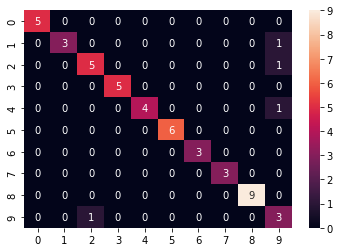

In [28]:
cnf_mat = confusion_matrix(tmp2, arr)
sns.heatmap(cnf_mat, annot = True)